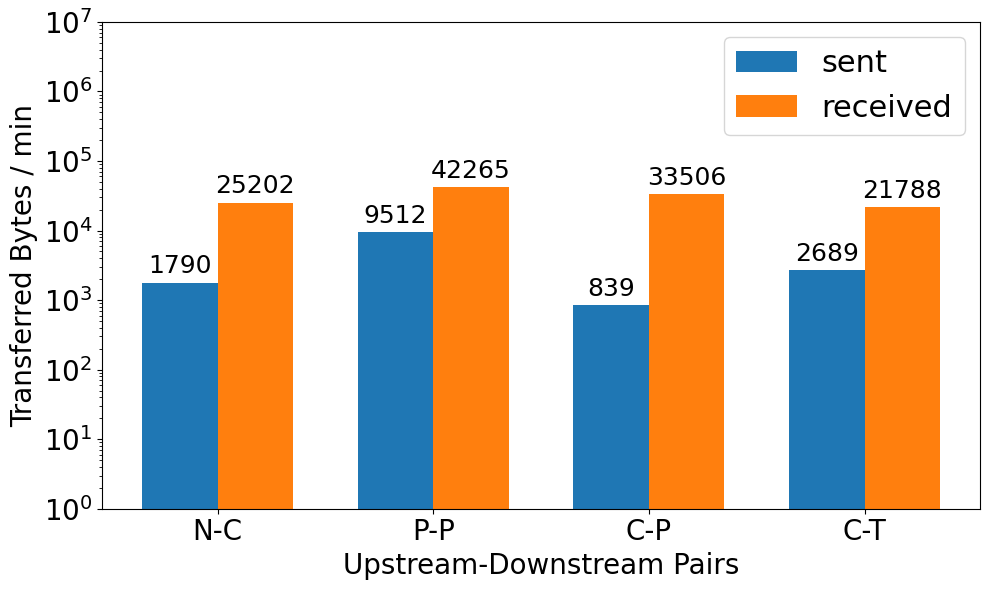

In [66]:
'''UM-DM pair ofr sent and received traffic difference
workload_src="nginx-thrift", workload_dst="compose-post-service",
average_traffic_sent=1790.5867768595042, average_traffic_received=25202.07438016529
Average traffic (Byte) per 1 minutes: 13496.330578512398 (Byte)

workload_src="compose-post-service", workload_dst="text-service"
average_traffic_sent=26829.87603305785, average_traffic_received=21788.15702479339
Average traffic (Byte) per 1 minutes: 24309.01652892562 (Byte)

workload_src="post-storage-service", workload_dst="post-storage-mongodb"
average_traffic_sent=9512.90909090909, average_traffic_received=42265.776859504134
Average traffic (Byte) per 1 minutes: 25889.34297520661 (Byte)

workload_src="compose-post-service", workload_dst="post-storage-service"
average_traffic_sent=839.5123966942149, average_traffic_received=33506.289256198346
Average traffic (Byte) per 1 minutes: 17172.90082644628 (Byte)


(UM,DM, sent, received)
'''

import matplotlib.pyplot as plt
import numpy as np

# Data provided
UM_DM = {('N','C', 1790, 25202), ('C','T', 2689, 21788), ('P','P', 9512, 42265), ('C', 'P', 839, 33506)}

# Preparing data for plotting
labels = [f"{um}-{dm}" for um, dm, _, _ in UM_DM]
values1 = [val1 for _, _, val1, _ in UM_DM]
values2 = [val2 for _, _, _, val2 in UM_DM]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values1, width, label='sent')
rects2 = ax.bar(x + width/2, values2, width, label='received')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Transferred Bytes / min', fontsize=20)
# ax.set_title('Bytes per minute by UM-DM pair')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.set_yscale('log')

# Setting logarithmic y-axis tick labels
ax.set_xlabel('Upstream-Downstream Pairs', fontsize=20)
y_ticks = [10**i for i in range(8)]  
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'$10^{i}$' for i in range(8)], fontsize=20)  # Adjust range

ax.legend(fontsize="22")

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize =18)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
'''
finish 90% of the paper first
'''

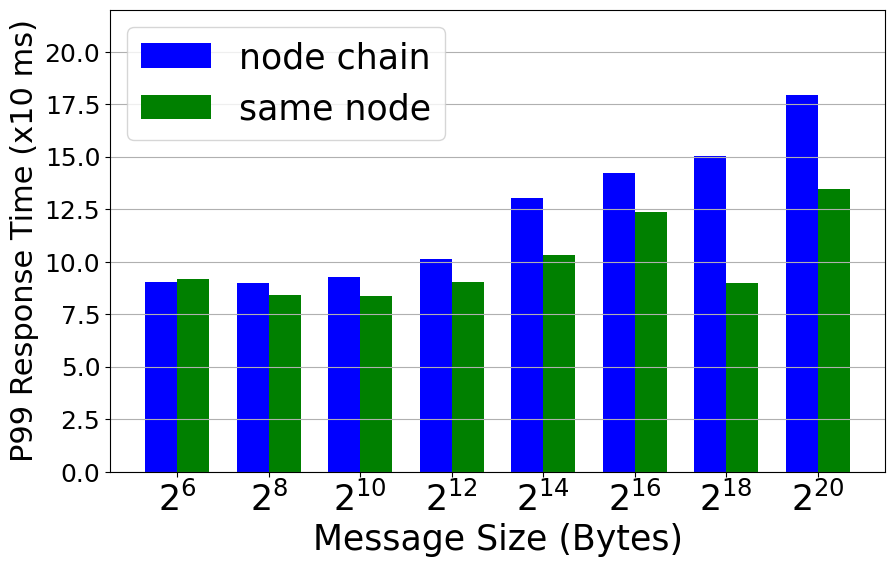

In [71]:
'''
QPS=3000 reqs/second
'''
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

# Data
message_sizes = [2**6,2**8, 2**10, 2**12, 2**14, 2**16, 2**18, 2**20]  # Byte

urls = ["node chain", "same node"]
p99_ResponseTime = [[90.09, 91.72], [89.63, 84.12], [92.82, 83.68], [101.00, 90.06], [130.29, 102.88],[142.05, 123.80], [150.09, 89.85], [179.10, 134.40]]

p99_same_node = []
p99_different_node = []

for i in range(len(p99_ResponseTime)):
    p99_same_node.append(p99_ResponseTime[i][1]/10) 
    p99_different_node.append(p99_ResponseTime[i][0]/10)

# Configuration for bar width and positions
bar_width = 0.35  # Width of the bars
index = np.arange(len(message_sizes))  # Numeric array for bar positioning

plt.figure(figsize=(10, 6))
bars2 = plt.bar(index , p99_different_node, bar_width, label='node chain', color='blue')
bars1 = plt.bar(index+ bar_width, p99_same_node, bar_width, label='same node', color='green')


plt.xlabel('Message Size (Bytes)', fontsize="25")
plt.ylabel('P99 Response Time (x10 ms)',  fontsize="22")
# Formatting x-tick labels to show as powers of two
plt.xticks(index + bar_width / 2, [f'$2^{{{int(np.log2(size))}}}$' for size in message_sizes],  fontsize="25")
plt.yticks( fontsize="18")
plt.grid(visible=True, which="major", axis="y")
plt.legend(fontsize="25")
plt.ylim([0,22])

plt.show()


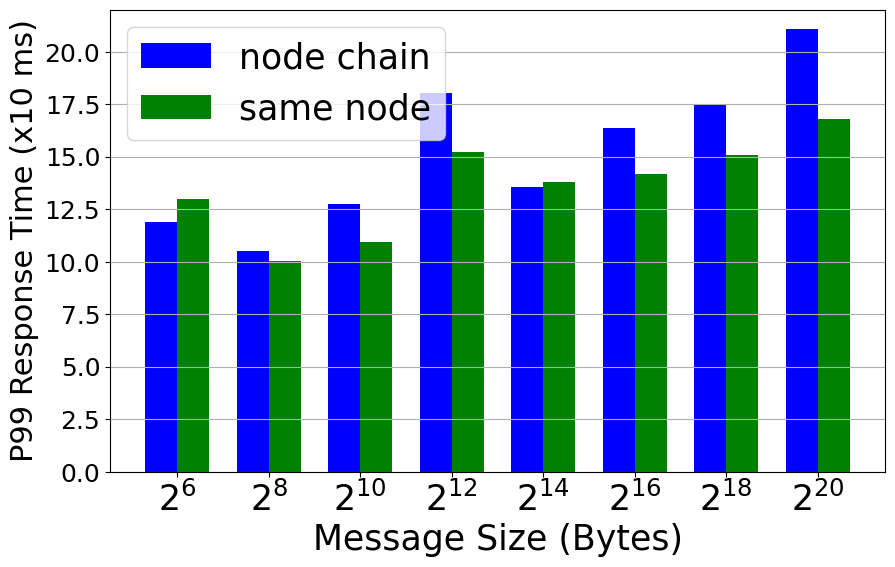

In [72]:
'''
QPS=5000 reqs/second
run in client pod
'''
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

# Data
message_sizes = [2**6,2**8, 2**10, 2**12, 2**14, 2**16, 2**18, 2**20]  # Byte

urls = ["node chain", "same node"]
p99_ResponseTime = [[118.63, 129.66], [104.88, 100.40], [127.33, 109.48], [180.04, 152.27],[135.55, 137.88], [163.57, 141.91], [174.53, 150.50],[210.68, 167.64]]

p99_same_node = []
p99_different_node = []

for i in range(len(p99_ResponseTime)):
    p99_same_node.append(p99_ResponseTime[i][1]/10) 
    p99_different_node.append(p99_ResponseTime[i][0]/10)

# Configuration for bar width and positions
bar_width = 0.35  # Width of the bars
index = np.arange(len(message_sizes))  # Numeric array for bar positioning

plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, p99_different_node, bar_width, label='node chain', color='blue') 
bars2 = plt.bar(index + bar_width, p99_same_node, bar_width, label='same node', color='green')

plt.xlabel('Message Size (Bytes)', fontsize="25")
plt.ylabel('P99 Response Time (x10 ms)',  fontsize="22")
# Formatting x-tick labels to show as powers of two
plt.xticks(index + bar_width / 2, [f'$2^{{{int(np.log2(size))}}}$' for size in message_sizes],  fontsize="25")
plt.yticks( fontsize="18")
plt.grid(visible=True, which="major", axis="y")
plt.legend( fontsize="25")
plt.ylim([0,22])

plt.show()



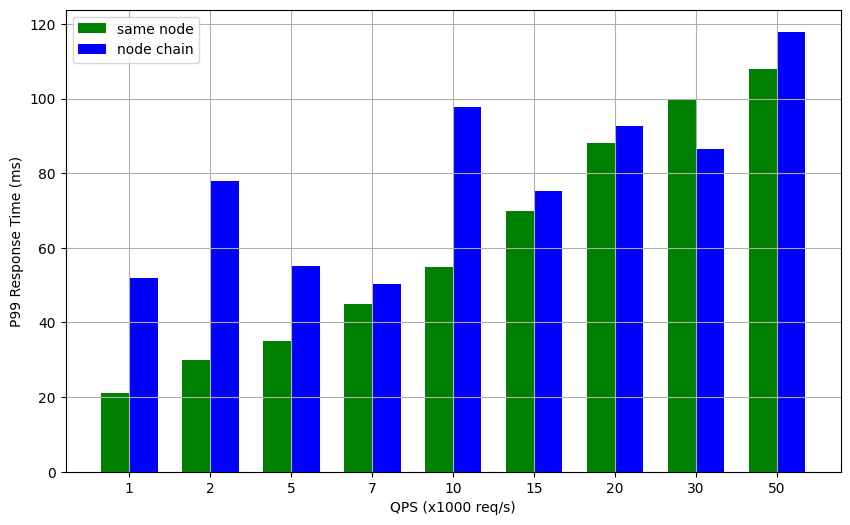

In [1]:
'''Response time under different QPS'''
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

# Data
QPS = [1000, 2000, 5000, 7000, 10000, 15000, 20000, 30000, 50000] # req/secpnd
p99_same_node = [21, 30, 35, 45, 55, 70, 88, 100, 108]
p99_different_node = [52.05, 77.96, 55.05, 50.21, 97.70, 75.37, 92.64, 86.53, 117.94]

# Configuration for bar width and positions
bar_width = 0.35  # Width of the bars
index = np.arange(len(QPS))  # Numeric array of QPS indices for bar positioning
plt.figure(figsize=(10, 6))
bars1 = plt.bar(index , p99_same_node, bar_width, label='same node', color='green')

bars2 = plt.bar(index + bar_width, p99_different_node, bar_width, label='node chain', color='blue')

# plt.title('P99 Response Times at Different QPS')
plt.xlabel('QPS (x1000 req/s)')
plt.ylabel('P99 Response Time (ms)')
plt.xticks(index + bar_width / 2, [int(q/1000) for q in QPS])  # Set x-tick labels centered on the group
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
'''Response time under different bandwidth limit, client-server pods at different node
(1) QPS = 5000,
bandwidth_limit = [0, 10%, 30%, 50%, 50%, 70%, 90%]
p99_QPS_5k = [55.05, 52.63, 78.57, 81, 68, 75]


(2) QPS = 20000,
bandwidth_limit = [0, 10%, 30%, 50%, 50%, 70%, 90%]
p99_QPS_20k = [92.64, 91.47, 76.47, 56, 77]
'''


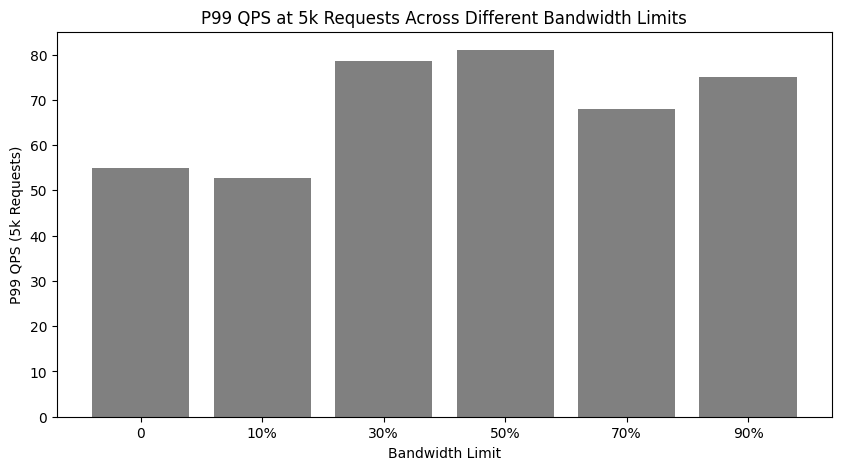

In [5]:
'''Response time under different bandwidth limit, client-server pods at different node'''
import matplotlib.pyplot as plt

# Data
bandwidth_limit = ['0', '10%', '30%', '50%', '70%', '90%']
p99_QPS_5k = [55.05, 52.63, 78.57, 81, 68, 75]

# Create the bar chart
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(bandwidth_limit, p99_QPS_5k, color='grey')  # Create a bar chart

# Adding titles and labels
plt.title('P99 QPS at 5k Requests Across Different Bandwidth Limits')
plt.xlabel('Bandwidth Limit')
plt.ylabel('P99 QPS (5k Requests)')

# Display grid lines
# plt.grid(axis='y')  # Grid lines only on the y-axis

# Show the plot
plt.show()

